Perbandingan label

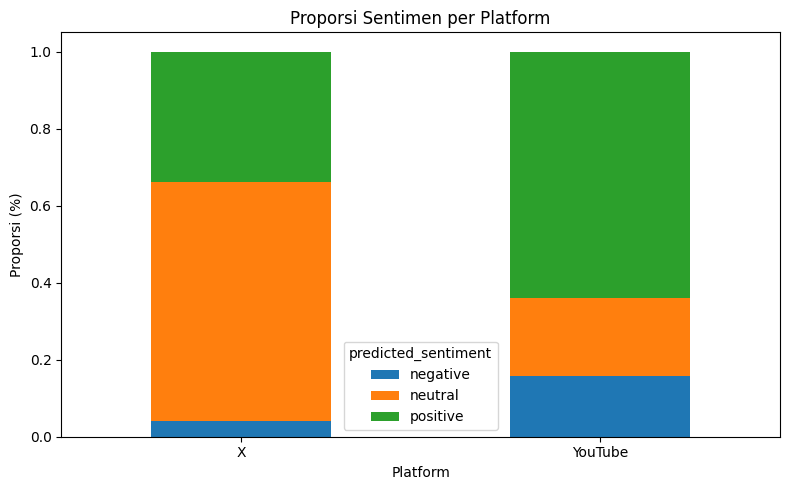

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df_y = pd.read_csv("label YT.csv")
df_x = pd.read_csv("label X.csv")

if "platform" in df_y.columns:
    df_y = df_y.drop(columns=["platform"])
if "platform" in df_x.columns:
    df_x = df_x.drop(columns=["platform"])

df_y["platform"] = "YouTube"
df_x["platform"] = "X"

df_y["hf_label"] = df_y["hf_label"].astype(str).str.strip().str.lower()
df_x["hf_label"] = df_x["hf_label"].astype(str).str.strip().str.lower()

df = pd.concat([df_y, df_x], ignore_index=True)

sentiment_counts = df.groupby(["platform", "hf_label"]).size().reset_index(name='count')

total_counts_per_platform = sentiment_counts.groupby('platform')['count'].transform('sum')

sentiment_counts['proportion'] = sentiment_counts['count'] / total_counts_per_platform

proporsi = sentiment_counts.pivot_table(index='platform', columns='hf_label', values='proportion', fill_value=0)

proporsi.plot(kind="bar", stacked=True, figsize=(8,5))

plt.title("Proporsi Sentimen per Platform")
plt.xlabel("Platform")
plt.ylabel("Proporsi (%)")
plt.legend(title="predicted_sentiment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Perbandingan Frekuensi Kata

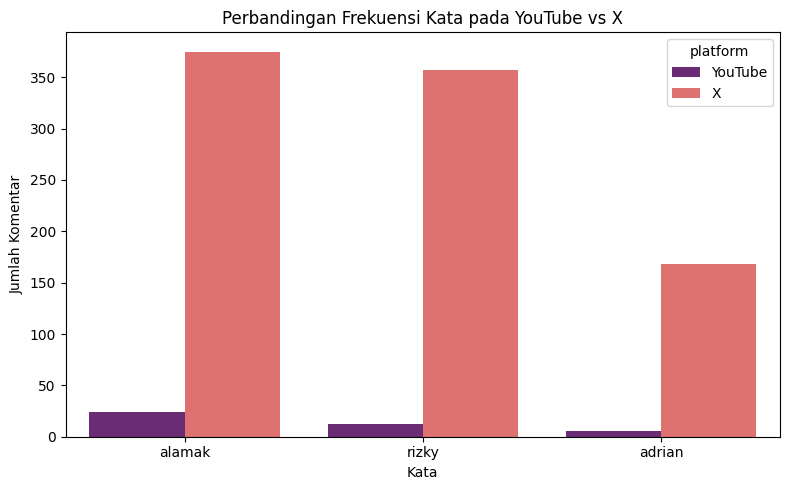

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

yt = pd.read_csv("frekuensi_katayt.csv")
x  = pd.read_csv("frekuensi_katax.csv")

yt["platform"] = "YouTube"
x["platform"] = "X"

df_compare = pd.concat([yt, x], ignore_index=True)

plt.figure(figsize=(8,5))
sns.barplot(data=df_compare, x="kata", y="jumlah_komentar", hue="platform", palette="magma")

plt.title("Perbandingan Frekuensi Kata pada YouTube vs X")
plt.ylabel("Jumlah Komentar")
plt.xlabel("Kata")
plt.tight_layout()
plt.show()